In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
X = 6 * np.random.rand(100,1) - 3
Y = 0.5* X**2 + 1.5*X + 2 + np.random.rand(100,1)

Text(0, 0.5, 'Y dataset')

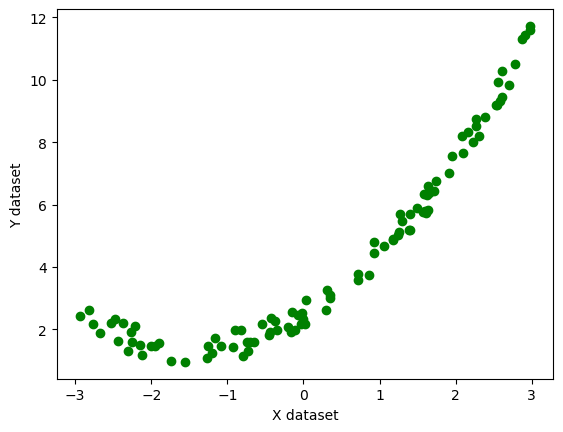

In [26]:
plt.scatter(X,Y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [32]:
regression.fit(X_train,Y_train)

LinearRegression()

In [34]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,regression.predict(X_test))

In [36]:
score

0.8278135585297101

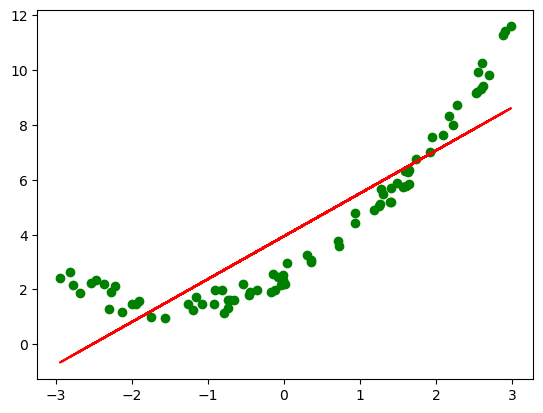

In [50]:
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,Y_train,color='g')

In [52]:
# lets apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures


In [54]:
poly= PolynomialFeatures()

In [64]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [58]:
X_train_poly

array([[ 1.00000000e+00,  7.10858897e-01,  5.05320371e-01],
       [ 1.00000000e+00,  9.31949987e-01,  8.68530778e-01],
       [ 1.00000000e+00,  2.04955866e-02,  4.20069071e-04],
       [ 1.00000000e+00, -9.24784529e-01,  8.55226425e-01],
       [ 1.00000000e+00, -7.29780140e-01,  5.32579053e-01],
       [ 1.00000000e+00,  2.09450421e+00,  4.38694789e+00],
       [ 1.00000000e+00,  3.09378005e-01,  9.57147499e-02],
       [ 1.00000000e+00, -4.59445732e-01,  2.11090381e-01],
       [ 1.00000000e+00,  1.64848647e+00,  2.71750764e+00],
       [ 1.00000000e+00, -1.07764864e+00,  1.16132658e+00],
       [ 1.00000000e+00, -4.44304511e-01,  1.97406498e-01],
       [ 1.00000000e+00,  1.62866983e+00,  2.65256540e+00],
       [ 1.00000000e+00, -7.40138525e-01,  5.47805036e-01],
       [ 1.00000000e+00,  2.55096324e+00,  6.50741346e+00],
       [ 1.00000000e+00,  1.95056126e+00,  3.80468923e+00],
       [ 1.00000000e+00,  1.39274205e+00,  1.93973043e+00],
       [ 1.00000000e+00, -1.66480213e-01

In [60]:
X_train

array([[ 0.7108589 ],
       [ 0.93194999],
       [ 0.02049559],
       [-0.92478453],
       [-0.72978014],
       [ 2.09450421],
       [ 0.309378  ],
       [-0.45944573],
       [ 1.64848647],
       [-1.07764864],
       [-0.44430451],
       [ 1.62866983],
       [-0.74013852],
       [ 2.55096324],
       [ 1.95056126],
       [ 1.39274205],
       [-0.16648021],
       [ 2.27048229],
       [-0.90150285],
       [ 1.4899933 ],
       [ 1.2614428 ],
       [ 1.56703082],
       [-0.54115354],
       [ 2.61487185],
       [ 2.60534092],
       [ 2.98345085],
       [-2.12844531],
       [-1.56143222],
       [-1.74495926],
       [-2.36845385],
       [-1.94833506],
       [-2.67748262],
       [ 0.35415505],
       [-2.76751863],
       [-1.90130051],
       [ 1.4018077 ],
       [ 2.52388109],
       [-0.14440724],
       [-0.03705984],
       [-1.15850299],
       [ 1.59908572],
       [-2.94284486],
       [-2.00012373],
       [ 1.58730648],
       [-1.25428668],
       [ 0

In [68]:
from sklearn.metrics import r2_score
regression_1=LinearRegression()
regression_1.fit(X_train_poly,Y_train)
y_pred=regression_1.predict(X_test_poly)
score_1=r2_score(Y_test,y_pred)

In [70]:
score_1

0.9925737510344178

In [74]:
print(regression_1.coef_)

[[0.         1.48295165 0.51549673]]


In [76]:
print(regression_1.intercept_)

[2.44972674]


In [78]:
print(regression.intercept_)

[3.94332313]


In [80]:
print(regression.coef_)

[[1.56571845]]


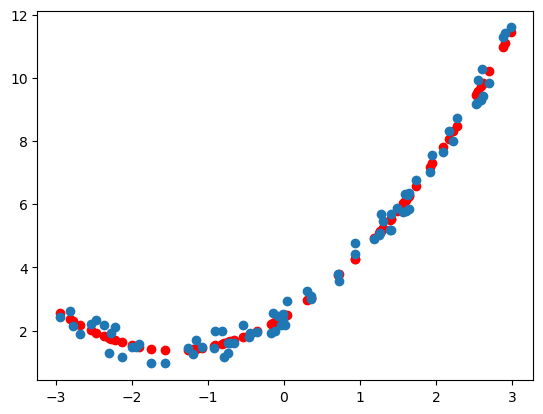

In [93]:
plt.scatter(X_train,regression_1.predict(X_train_poly),color='r')
plt.scatter(X_train,Y_train)

In [109]:
# prediction for new data
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly= poly.transform(X_new)

In [113]:
poly = PolynomialFeatures(degree=2)  # or 3, etc.
X_train_poly = poly.fit_transform(X_train)

# Train on transformed features
regression = LinearRegression()
regression.fit(X_train_poly, Y_train)

LinearRegression()

In [117]:
X_new_poly = poly.transform(X_new)  # Transform using the SAME 'poly' object
y_new = regression.predict(X_new_poly)

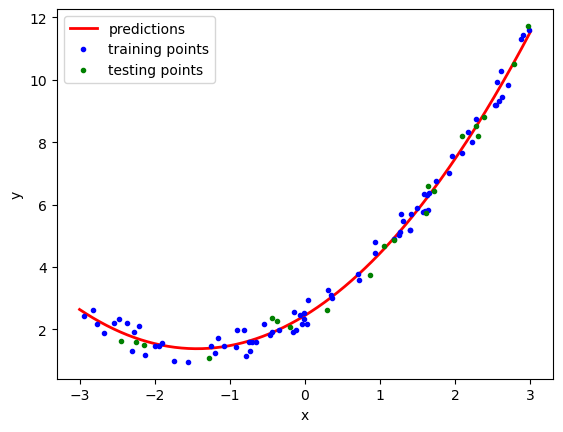

In [123]:
y_new= regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='predictions')
plt.plot(X_train,Y_train,'b.',label='training points')
plt.plot(X_test,Y_test,'g.',label='testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [133]:
from sklearn.pipeline import Pipeline

In [143]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

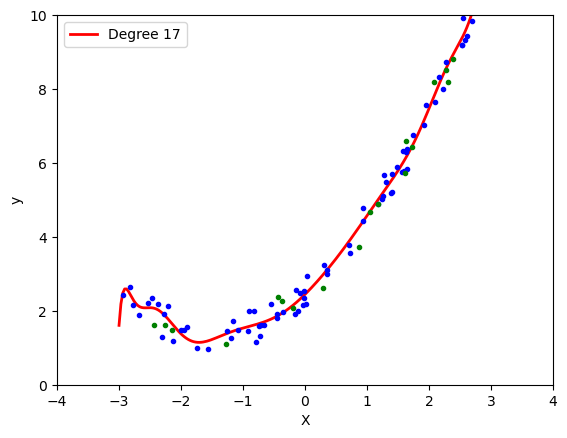

In [151]:
poly_regression(17)